[*********************100%%**********************]  1 of 1 completed
/var/folders/sj/lr719rvn6hggrcrnr3dp0npr0000gn/T/ipykernel_53132/615307129.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = pd.concat([sp500['Adj Close'].resample('M').last(), credit_spreads.resample('M').last()], axis=1)


                  SP500  Credit_Spreads
2000-01-31  1394.459961            4.87
2000-02-29  1366.420044            5.08
2000-03-31  1498.579956            5.75
2000-04-30  1452.430054            5.88
2000-05-31  1420.599976            6.16
Total Return: 8.26
Sharpe Ratio: 0.91


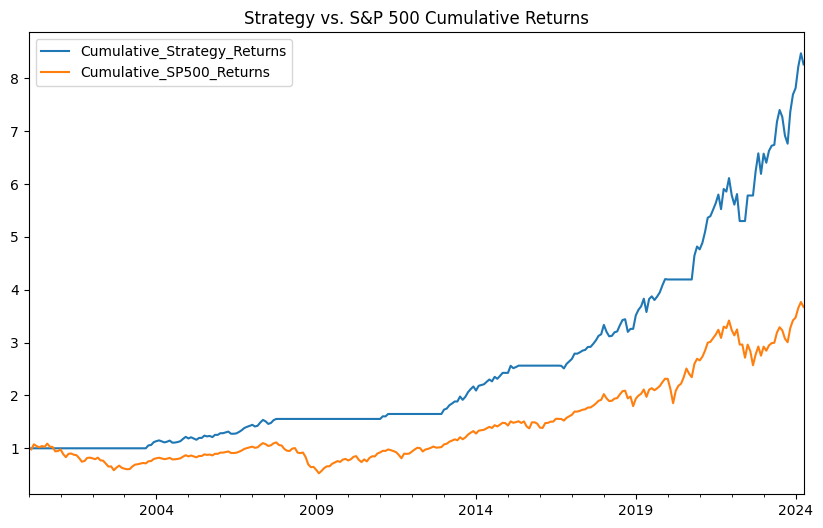

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import yfinance as yf

sp500 = yf.download('^GSPC', start='2000-01-01', end='2024-04-15')

# Fetching the US high yield credit spread data from FREDs
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=BAMLH0A0HYM2'
credit_spreads = pd.read_csv(url, index_col='DATE', parse_dates=True)

# Cleaning and converting credit spreads data
credit_spreads['BAMLH0A0HYM2'] = pd.to_numeric(credit_spreads['BAMLH0A0HYM2'], errors='coerce')
credit_spreads.dropna(inplace=True)  # Drop any rows that still contain NaN

# Combining datasets and resampling to monthly frequency
data = pd.concat([sp500['Adj Close'].resample('M').last(), credit_spreads.resample('M').last()], axis=1)
data.columns = ['SP500', 'Credit_Spreads']

# Removing any rows with NaN values
data.dropna(inplace=True)

# Verifying the data
print(data.head())

# Defining the risk-on/risk-off threshold
threshold = 5.0  
# Create the investment signals
data['Position'] = (data['Credit_Spreads'] < threshold).astype(int)

# Calculating returns
data['SP500_Returns'] = data['SP500'].pct_change()
data['Strategy_Returns'] = data['SP500_Returns'] * data['Position']

# Calculating cumulative returns
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()
data['Cumulative_SP500_Returns'] = (1 + data['SP500_Returns']).cumprod()

# Computing performance metrics
total_return = data['Cumulative_Strategy_Returns'].iloc[-1]
annual_returns = data['Strategy_Returns'].mean() * 12
annual_volatility = data['Strategy_Returns'].std() * np.sqrt(12)
sharpe_ratio = (annual_returns - 0.015) / annual_volatility  # Assuming 1.5% as the risk-free rate

print(f"Total Return: {total_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plotting cumulative returns
data[['Cumulative_Strategy_Returns', 'Cumulative_SP500_Returns']].plot(figsize=(10, 6))
plt.title('Strategy vs. S&P 500 Cumulative Returns')
plt.show()
